In [1]:
import os
import sys
import importlib
os.chdir("../..")
directory_path = os.path.abspath(os.path.join("src"))
if directory_path not in sys.path:
    sys.path.append(directory_path)

import EyeTraumaAnalysis

In [2]:
importlib.reload(EyeTraumaAnalysis)

<module 'EyeTraumaAnalysis' from '/Users/ryerrabelli/Library/CloudStorage/GoogleDrive-ryerrabelli@gmail.com/My Drive/Computer Backups/Rahul Yerrabelli drive/PythonProjects/EyeTraumaAnalysis/src/EyeTraumaAnalysis/__init__.py'>

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

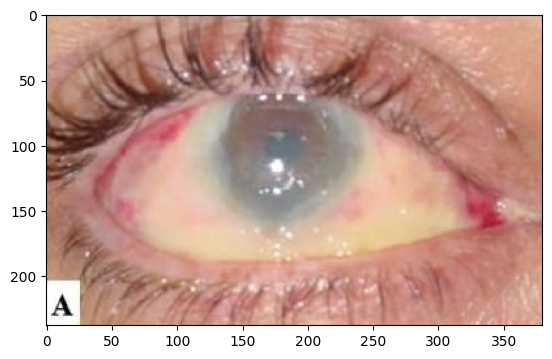

In [4]:
image = EyeTraumaAnalysis.Image("data/ischemic/00001_li.jpg")
plt.imshow(image.img)